# Application of Numerical Methods with Retail Operations

##### Natthakul Yikusung 6680972

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 1. Using linear regression for predicting

Simple linear regression models the linear relationship between two variables, where one variable (independent or predictor variable) predicts the values of the other variable (dependent or response variable)

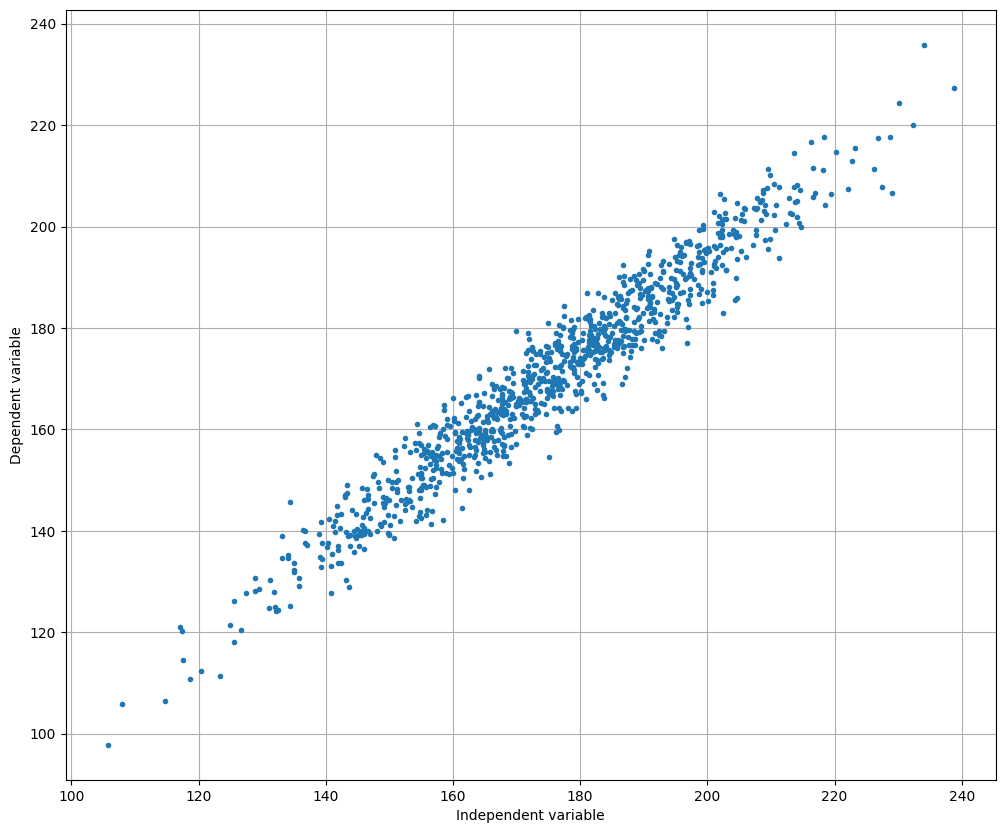

In [2]:
# Plot a random data

def data_sample(n_data=1000):
    dependent_var = np.random.normal(loc=170, scale=20, size=n_data)
    noise = np.random.normal(loc=0, scale=5, size=n_data)
    
    # This means for every 1 unit Y changes, X changes by 1 unit.
    independent_var = 1.0 * dependent_var + 5 + noise
    
    return dependent_var, independent_var

y_axis, x_axis = data_sample()

plt.figure(figsize=(12, 10))
plt.plot(x_axis, y_axis, '.')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

Slope: 0.9383, Intercept: 5.8627


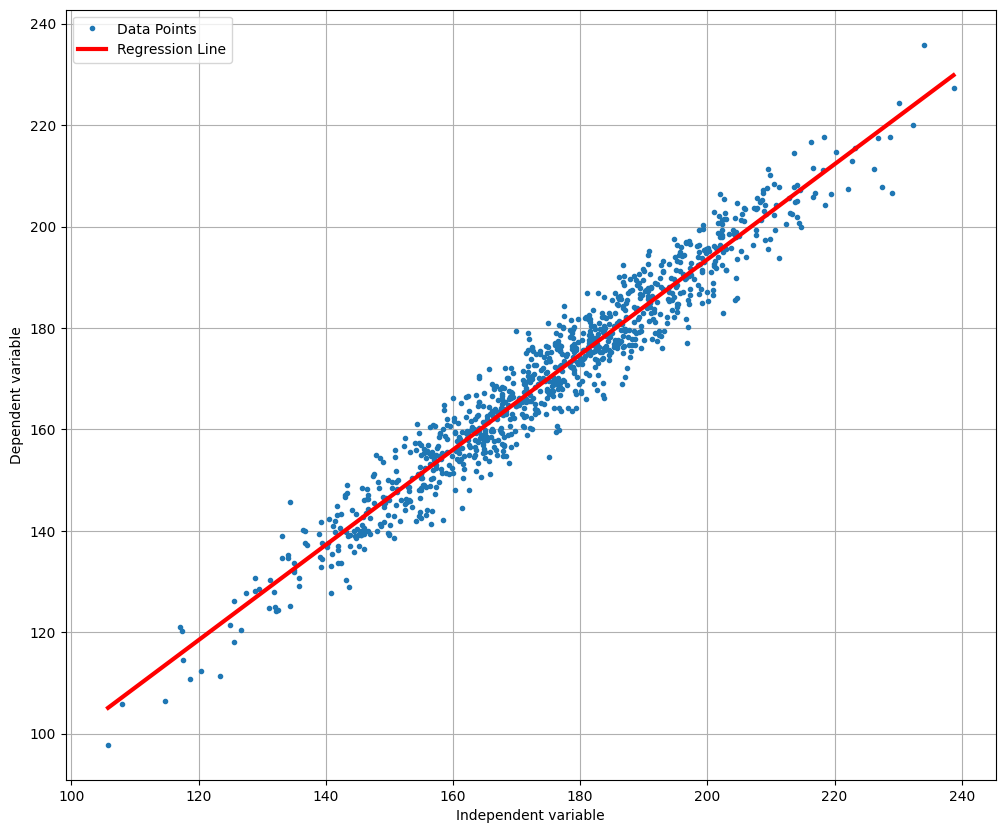

In [3]:
# Applying in-class code for sample plot

def best_line(xs, ys):
    def sx(nx):
        return np.sum(xs**nx)
    def sxy(nx):
        return np.sum(xs**nx * ys)
    A = np.array([[sx(2), sx(1)],
                  [sx(1), sx(0)]])
    B = np.array([sxy(1), sxy(0)])
    return np.linalg.solve(A, B)

m, c = best_line(x_axis, y_axis)
print(f"Slope: {m:.4f}, Intercept: {c:.4f}")

line_x = np.linspace(min(x_axis), max(x_axis), 100)
line_y = m * line_x + c

plt.figure(figsize=(12, 10))
plt.plot(x_axis, y_axis, '.', label='Data Points')
plt.plot(line_x, line_y, 'r-', linewidth=3, label='Regression Line')

plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.legend()
plt.grid()
plt.show()


**Example of applications of simple linear regression in forecasting include:**
- Predicting sales based on advertising expenditure (sales revenue, marketing budget)
- Estimating demand based on price (product demand, pricing strategy)
- Forecasting energy consumption based on temperature (electricity usage, weather patterns)
- Projecting company growth based on market trends (revenue growth, economic indicators)

In this part, we would like to focus on **Demand Forecasting via Linear Regression**

### Application: Demand Forecasting via Linear Regression

We apply linear regression to a real-world scenario using the provided retail dataset (Walmart sales) to forecast demand (Weekly Sales) based on the independent variable, Temperature.


Store  | Slope ($/F)    
--------------------
1      | -327.68        
2      | -384.55        
3      | -97.95         


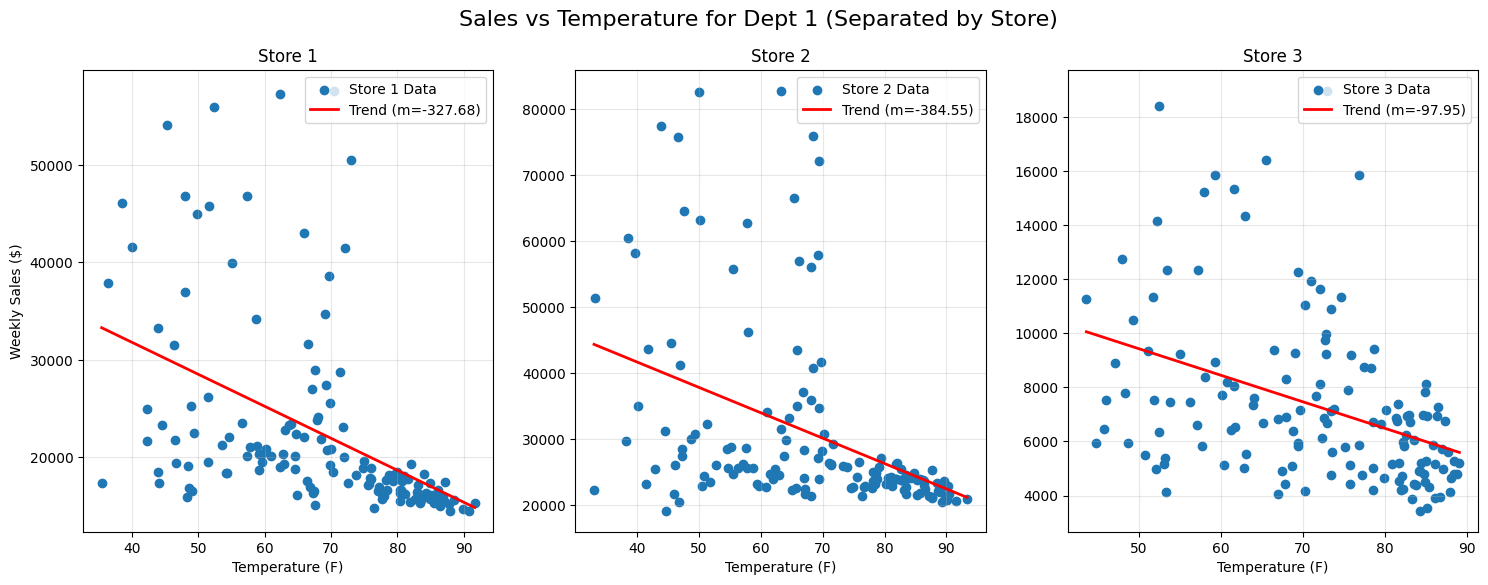

In [4]:


# Load Data
df_train = pd.read_csv('train.csv')
df_features = pd.read_csv('features.csv')

# Merge columns
df_merged = pd.merge(df_train, df_features, on=['Store', 'Date'], how='inner')

# Filter for Department 1 ONLY (across all stores)
dept_1_data = df_merged[df_merged['Dept'] == 1].copy()

# Pick the first 3 stores to visualize as examples
target_stores = [1, 2, 3] 

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Sales vs Temperature for Dept 1 (Separated by Store)', fontsize=16)

print(f"{'Store':<6} | {'Slope ($/F)':<15}")
print("-" * 20)

for i, store_id in enumerate(target_stores):
    ax = axes[i]
    
    # Filter data for the specific store
    store_subset = dept_1_data[dept_1_data['Store'] == store_id]
    
    x = store_subset['Temperature'].values
    y = store_subset['Weekly_Sales'].values
    
    # Perform Linear Regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Plot Points
    ax.scatter(x, y, label=f'Store {store_id} Data')
    
    # Plot Regression Line
    line_x = np.linspace(min(x), max(x), 100)
    line_y = slope * line_x + intercept
    ax.plot(line_x, line_y, 'r-', linewidth=2, label=f'Trend (m={slope:.2f})')
    
    # Formatting
    ax.set_title(f"Store {store_id}")
    ax.set_xlabel("Temperature (F)")
    if i == 0:
        ax.set_ylabel("Weekly Sales ($)")
    
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Print Stats
    print(f"{store_id:<6} | {slope:<15.2f}")

plt.show()

#### Stability

It is fast and usually accurate, but it has a weakness, which is **it getting confused by outliers**. 

In real retail data, factors like holidays or events (outliers) can significantly skew the trend line. We examine real-world data for Store 2, Department 1 to see this effect.

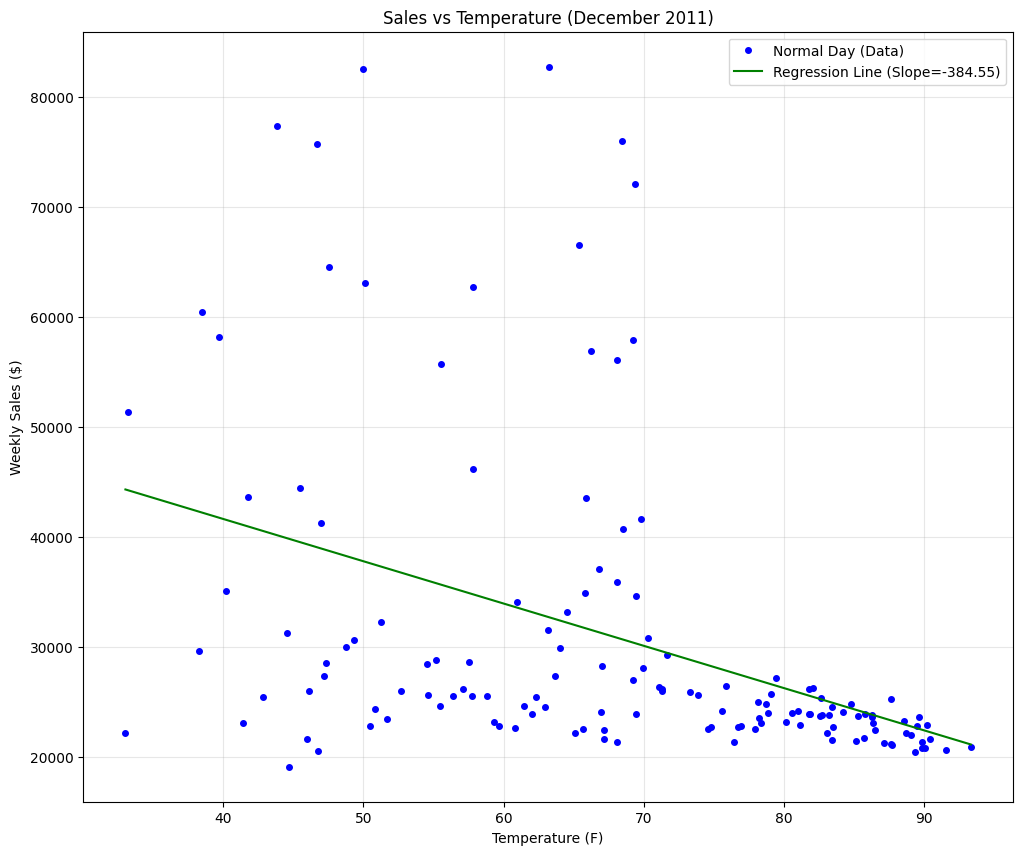

Slope: -384.5509
Intercept: 57010.6480


In [ ]:
df_train = pd.read_csv('train.csv')
df_features = pd.read_csv('features.csv')

# Merge columns 
# If a date is missing in one file, that data is dropped.
df_merged = pd.merge(df_train, df_features, on=['Store', 'Date'], how='inner')

# Convert Date to datetime
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged['Year'] = df_merged['Date'].dt.year
df_merged['Month'] = df_merged['Date'].dt.month

store_data = df_merged[(df_merged['Store'] == 2) & (df_merged['Dept'] == 1)]
# print(store_data)

# Extract X and Y
x = store_data['Temperature'].values
y = store_data['Weekly_Sales'].values

# Use Scipy to create Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Generate prediction line
line_x = np.linspace(min(x), max(x), 100)
line_y = slope * line_x + intercept

plt.figure(figsize=(12, 10))
plt.plot(x, y, 'b.', markersize=8, label='Normal Day (Data)')
plt.plot(line_x, line_y, 'g-', label=f'Regression Line (Slope={slope:.2f})')

plt.title('Sales vs Temperature (December 2011)')
plt.xlabel('Temperature (F)')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

To improve the stability, we need a mathematical rule to automatically find and remove the outliers, which is **Z-Score Filtering**. 

Z-Score tells how unusual a single data is compared to the rest. It transforms raw data to "Standard Score."

![Normal Distribution](https://editor.analyticsvidhya.com/uploads/440971.png)

Source: Analytics Vidhya

The Formula:$$Z = \frac{x - \mu}{\sigma}$$

- $x$ (The Data Point) : The specific value
- $\mu$ (The Mean) : The average value
- $\sigma$ (The Standard Deviation) : A measure of how spread out

In almost any dataset, 95% of all data points will have a Z-Score between -3.0 and +3.0. Anything outside this range is statistically rare and is classified as an Outlier.

In [6]:
def filter_outliers(x, y, threshold=3.0):
    mean_y = np.mean(y)
    std_y = np.std(y)
    
    z_scores = np.abs((y - mean_y) / std_y)
    
    good_indices = np.where(z_scores < threshold)
    bad_indices = np.where(z_scores >= threshold)
    
    return x[good_indices], y[good_indices], bad_indices

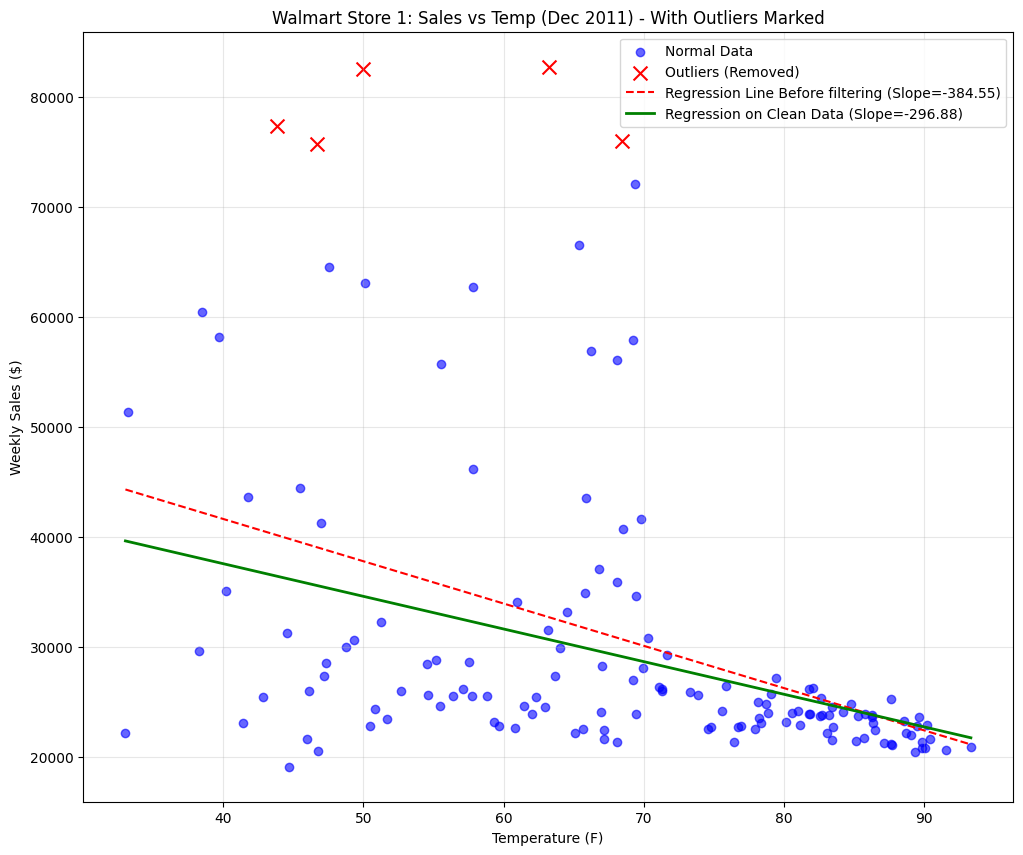

In [7]:
x_clean, y_clean, bad_indices_tuple = filter_outliers(x, y)
# print(bad_indices)
# print(bad_indices_tuple[0])
bad_indices = bad_indices_tuple[0] # extract array from tuple

# Get outlier data for plotting
x_outliers = x[bad_indices]
y_outliers = y[bad_indices]

# Regression on clean data
slope_clean, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)

# Generate regression line points
line_x_clean = np.linspace(min(x_clean), max(x_clean), 100)
line_y_clean = slope_clean * line_x + intercept

plt.figure(figsize=(12, 10))

# Plot clean data
plt.scatter(x_clean, y_clean, color='blue', alpha=0.6, label='Normal Data')

# Plot outliers (The 'x' you asked for)
plt.scatter(x_outliers, y_outliers, color='red', marker='x', s=100, label='Outliers (Removed)')

# Plot regression line
plt.plot(line_x, line_y, 'r--', label=f'Regression Line Before filtering (Slope={slope:.2f})')
plt.plot(line_x_clean, line_y_clean, 'g-', linewidth=2, label=f'Regression on Clean Data (Slope={slope_clean:.2f})')

plt.title('Walmart Store 1: Sales vs Temp (Dec 2011) - With Outliers Marked')
plt.xlabel('Temperature (F)')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


The slope calculated on the clean data (green line) is much flatter and more stable, suggesting the original model was misleading.

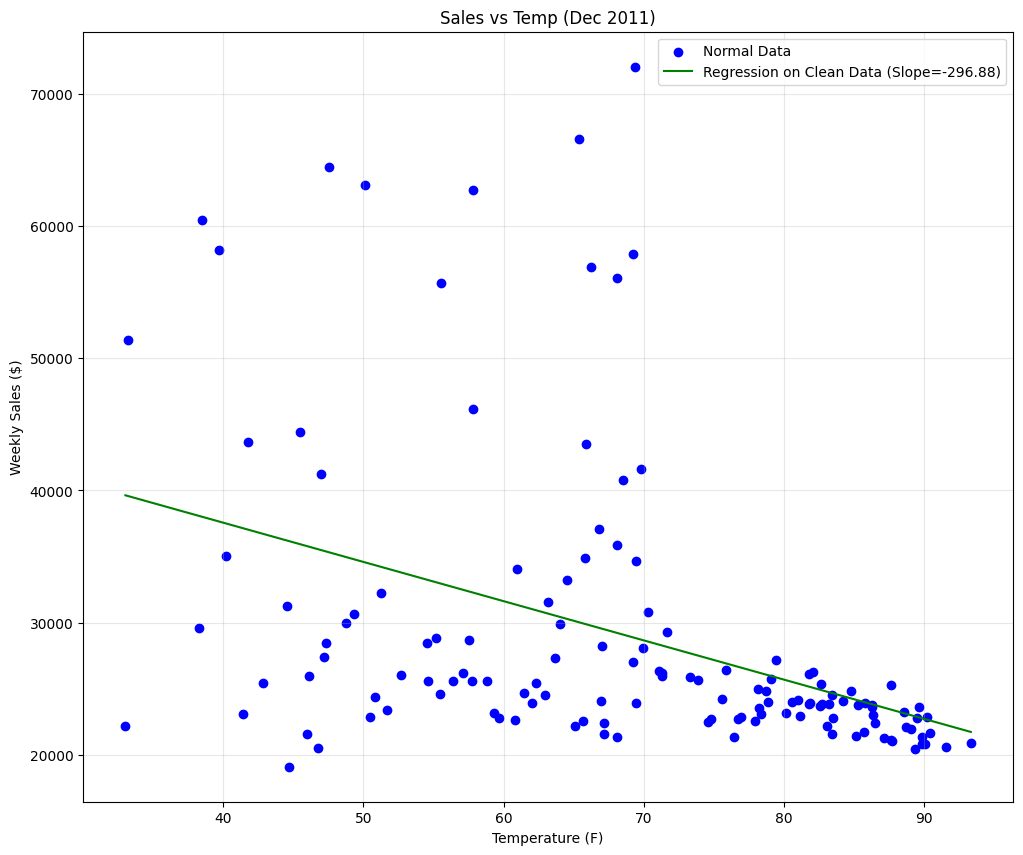

In [8]:
plt.figure(figsize=(12, 10))
plt.scatter(x_clean, y_clean, color='blue', label='Normal Data')

plt.plot(line_x_clean, line_y_clean, 'g-', label=f'Regression on Clean Data (Slope={slope_clean:.2f})')

plt.title('Sales vs Temp (Dec 2011)')
plt.xlabel('Temperature (F)')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

Store  | Clean Slope    
--------------------
1      | -286.20        
2      | -296.88        
3      | -90.81         


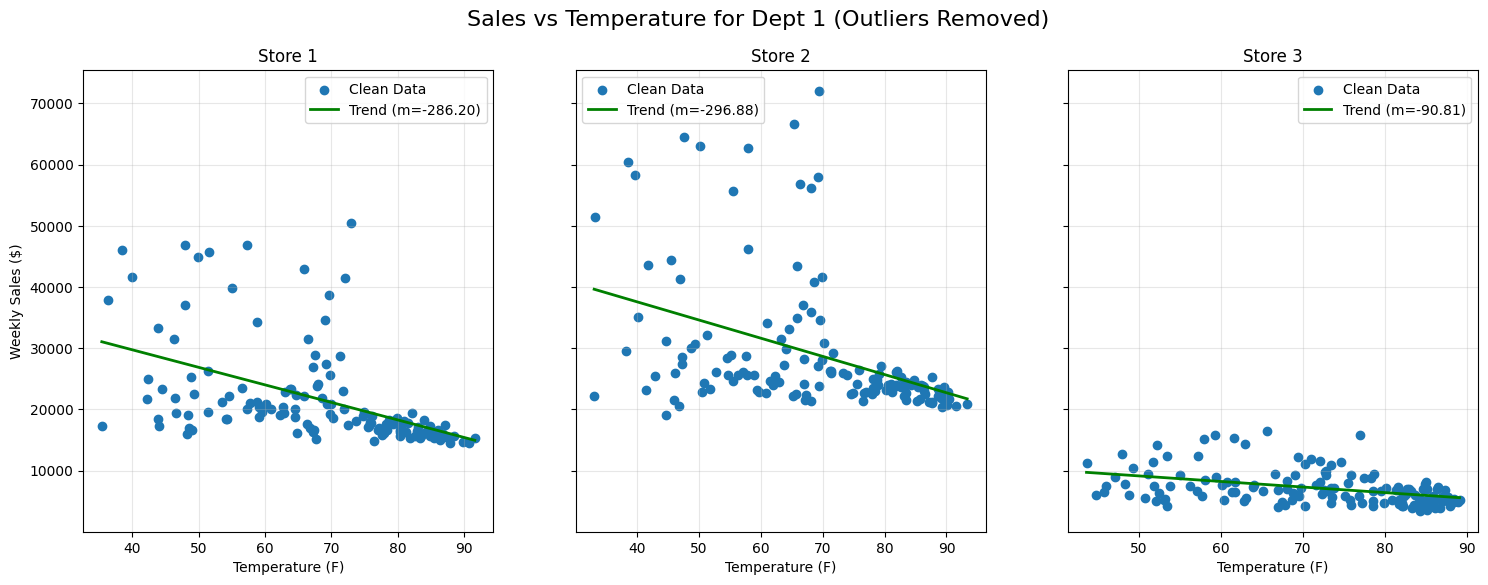

In [9]:
target_stores = [1, 2, 3]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Sales vs Temperature for Dept 1 (Outliers Removed)', fontsize=16)

print(f"{'Store':<6} | {'Clean Slope':<15}")
print("-" * 20)

for i, store_id in enumerate(target_stores):
    ax = axes[i]
    
    # Filter data
    store_subset = dept_1_data[dept_1_data['Store'] == store_id]
    x_raw = store_subset['Temperature'].values
    y_raw = store_subset['Weekly_Sales'].values
    
    # Apply Filter
    x_clean, y_clean, bad_indices = filter_outliers(x_raw, y_raw, threshold=3)
    
    # Regression on CLEAN data
    if len(x_clean) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
        
        # Plot
        ax.scatter(x_clean, y_clean , label='Clean Data')
        
        # Line
        line_x = np.linspace(min(x_clean), max(x_clean), 100)
        line_y = slope * line_x + intercept
        ax.plot(line_x, line_y, 'g-', linewidth=2, label=f'Trend (m={slope:.2f})')
        
        ax.set_title(f"Store {store_id}")
        ax.set_xlabel("Temperature (F)")
        if i == 0: ax.set_ylabel("Weekly Sales ($)")
        ax.legend()
        
        print(f"{store_id:<6} | {slope:<15.2f}")
    else:
        ax.set_title(f"Store {store_id} (No Data)")

    ax.grid(True, alpha=0.3)

plt.show()

## 2. Differentiation & Volatility Analysis

The derivative $f'(t)$ measures the rate of change of a function. In the context of retail sales, if $f(t)$ is the "Total Sales at week $t$", then the derivative $f'(t)$ represents the "Sales Velocity" (or Momentum).
- Positive Velocity ($f'(t) > 0$): Sales are increasing. A steep positive slope means sales are exploding (e.g., pre-holiday rush).
- Negative Velocity ($f'(t) < 0$): Sales are decreasing. A steep negative slope indicates a crash (e.g., post-holiday slump).
- Zero Velocity ($f'(t) = 0$): Sales are stable.

Mathematically, we approximate this using **the Central Finite Difference formula**:
$$f'(t) \approx \frac{f(t+h) - f(t-h)}{2h}$$

where $h$ is the time step (e.g., 1 week, 4 weeks).

In [10]:
df_merged = pd.merge(df_train, df_features, on=['Store', 'Date'], how='inner')
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Filter for Store 1, Dept 1 and sort by Date
time_data = df_merged[(df_merged['Store'] == 1) & (df_merged['Dept'] == 1)].sort_values('Date')

# Convert dates to "Week Numbers" (Continuous: 0, 1, 2 ... N)
time_data['Week_Num'] = np.arange(len(time_data))
t_weeks = time_data['Week_Num'].values
sales_y = time_data['Weekly_Sales'].values

# Calculate the mathematical derivative of the polynomial
# Fit a high-degree polynomial to represent the "True" sales curve
poly_coeffs = np.polyfit(t_weeks, sales_y, deg=15) # Find the numbers (coefficients) for polynomial equation of degree 15 that minimizes the error between the curve and your data points
# print(poly_coeffs)
sales_model = np.poly1d(poly_coeffs)
# print(sales_model)
# print(sales_model[15])
exact_derivative_func = np.polyder(sales_model)

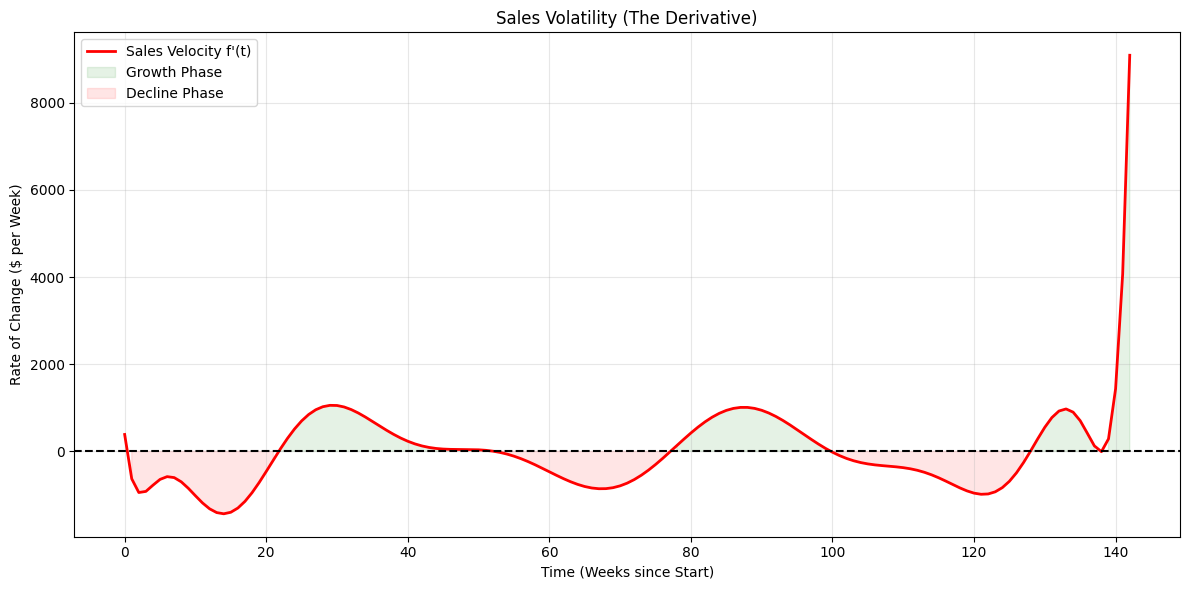

In [11]:
def get_sales_velocity(t, h=1):
    # Formula: ( f(t+h) - f(t-h) ) / 2h
    return (sales_model(t + h) - sales_model(t - h)) / (2 * h)

# Calculate volatility for every week 
velocities = []
for t in t_weeks:
    v = get_sales_velocity(t, h=1) 
    velocities.append(v)

# Visualization (Only Plot 2)
plt.figure(figsize=(12, 6))

plt.plot(t_weeks, velocities, 'r-', linewidth=2, label="Sales Velocity f'(t)")
plt.axhline(0, color='black', linestyle='--') # Zero line (Stability)

plt.title("Sales Volatility (The Derivative)")
plt.xlabel("Time (Weeks since Start)")
plt.ylabel("Rate of Change ($ per Week)")

# Add Growth/Decline shading
plt.fill_between(t_weeks, velocities, 0, where=(np.array(velocities)>0), color='green', alpha=0.1, label='Growth Phase')
plt.fill_between(t_weeks, velocities, 0, where=(np.array(velocities)<0), color='red', alpha=0.1, label='Decline Phase')

plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Red Line: Represents the Sales Velocity ($f'(t)$), showing how fast sales are growing or shrinking week-over-week.
- Green Areas: Indicate periods of Growth (Positive Velocity).
- Red Areas: Indicate periods of Decline (Negative Velocity).
- Zero Line: The dashed black line represents Stability (no change in sales).

#### Example of calculating sales velocity with $h$ = 13

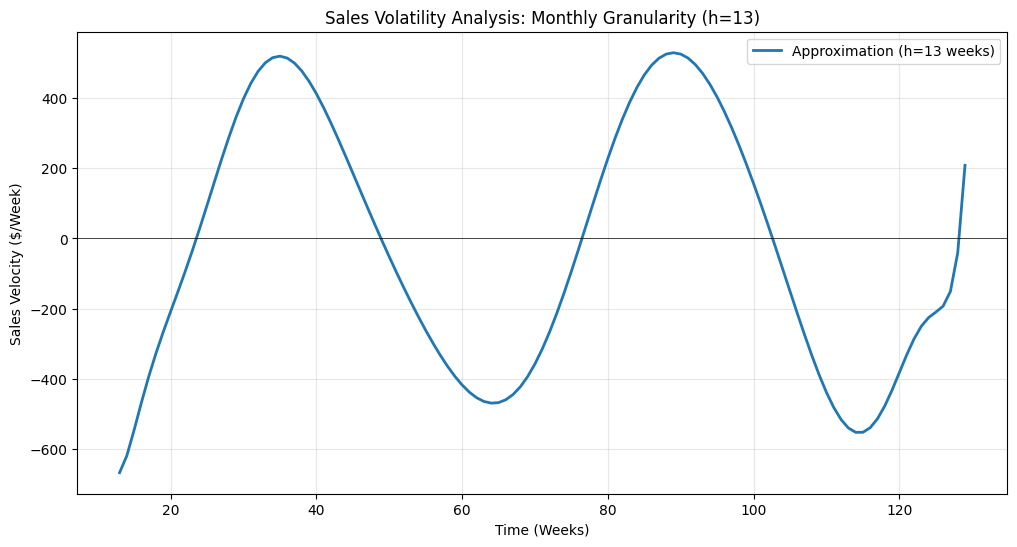

In [12]:
h = 13
test_points = t_weeks[h : -h] 

approx_deriv = get_sales_velocity(test_points, h)

plt.figure(figsize=(12, 6))

t_range = np.linspace(t_weeks.min(), t_weeks.max(), 200)

# Plot Approximation (h=4)
plt.plot(test_points, approx_deriv, linewidth=2, label=f'Approximation (h={h} weeks)')

plt.title(f"Sales Volatility Analysis: Monthly Granularity (h={h})")
plt.xlabel("Time (Weeks)")
plt.ylabel("Sales Velocity ($/Week)")
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

#### Example of calculating sales velocity with $h$ = 2

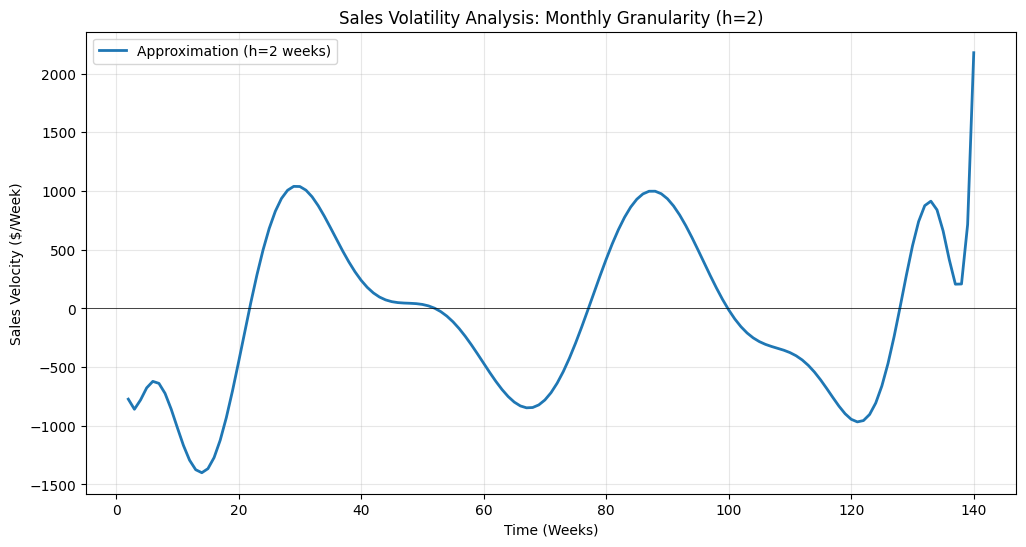

In [13]:
h = 2
test_points = t_weeks[h : -h] 

approx_deriv = get_sales_velocity(test_points, h)

plt.figure(figsize=(12, 6))

t_range = np.linspace(t_weeks.min(), t_weeks.max(), 200)

plt.plot(test_points, approx_deriv, linewidth=2, label=f'Approximation (h={h} weeks)')

plt.title(f"Sales Volatility Analysis: Monthly Granularity (h={h})")
plt.xlabel("Time (Weeks)")
plt.ylabel("Sales Velocity ($/Week)")
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

 - Large $h$ (13 weeks): Provides a macro-trend, smoothing out short-term fluctuations. It shows the overall 
 shift (e.g., the slow run-up to and drop from the holiday season).
 - Small $h$ (1 week): Provides maximum detail, highlighting specific week-to-week changes (e.g., the exact timing and severity of the post-Christmas slump).

### The differnt $h$ affecting graph

The Central Difference method has an error order of $O(h^2)$. This means if we cut the step size in half, the error should drop by a factor of $4$.

Granularity     | Step (h)   | Avg Absolute Error  
--------------------------------------------------
Quarter (13 wks) | 13         | $286.79              
Month (4 wks)   | 4          | $68.55               
Bi-Week (2 wks) | 2          | $29.87               
Week (1 wk)     | 1          | $10.80               


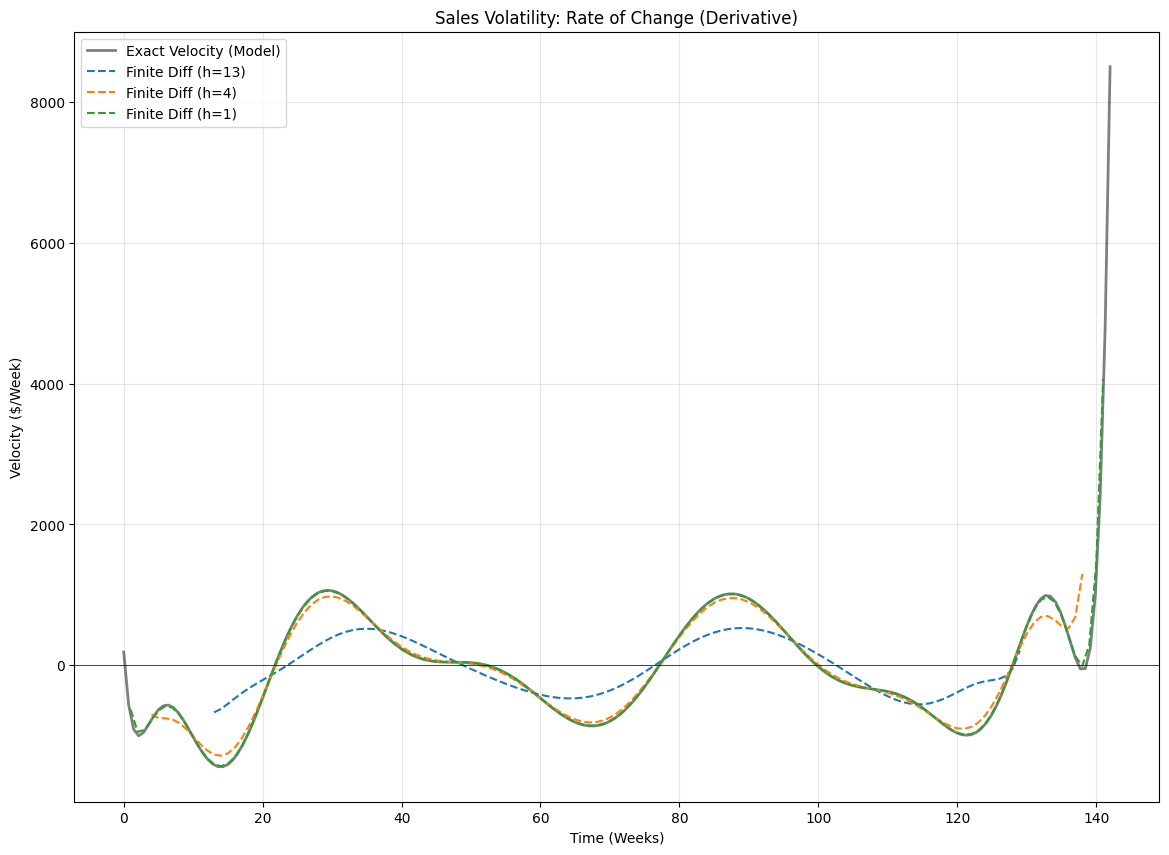

In [14]:
# Central difference & error study
# Test different step sizes (h)
step_sizes = {'Quarter (13 wks)': 13,'Month (4 wks)': 4,'Bi-Week (2 wks)': 2,'Week (1 wk)': 1}

h_values = []
avg_errors = []

# Pre-calculate plotting data for approximations to keep loop clean
plot_approximations = {}

print(f"{'Granularity':<15} | {'Step (h)':<10} | {'Avg Absolute Error':<20}")
print("-" * 50)

for label, h in step_sizes.items():
    test_points = t_weeks[h : -h] 
    
    approx_deriv = get_sales_velocity(test_points, h)
    
    true_deriv = exact_derivative_func(test_points)
    
    # Error
    mae = np.mean(np.abs(approx_deriv - true_deriv))
    h_values.append(h)
    avg_errors.append(mae)
    
    print(f"{label:<15} | {h:<10} | ${mae:<20.2f}")

    if h in [13, 4, 1]: 
        plot_approximations[h] = (test_points, approx_deriv, label)

# Graph 1: Sales Volatility 
plt.figure(figsize=(14, 10))
t_range = np.linspace(t_weeks.min(), t_weeks.max(), 200)
plt.plot(t_range, exact_derivative_func(t_range), 'k-', linewidth=2, label='Exact Velocity (Model)', alpha=0.5)

# Add approximations to Plot 1
for h, (pts, deriv, lbl) in plot_approximations.items():
     plt.plot(pts, deriv, linestyle='--', linewidth=1.5, label=f'Finite Diff (h={h})')

plt.title("Sales Volatility: Rate of Change (Derivative)")
plt.xlabel("Time (Weeks)")
plt.ylabel("Velocity ($/Week)")
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Conclusion
This project successfully applied two key numerical methods to retail data:

1. Linear Regression: Used for a basic prediction model (Demand vs. Temperature) with Z-Score Filtering, a critical stability measure used to clean the data, resulting in a more reliable and interpretable regression model.

2. Central Finite Difference: Used for Volatility Analysis (Sales Velocity), providing a powerful way to visualize and quantify the momentum of sales over different time granularities.